In [50]:
from __future__ import absolute_import, division
from tsfresh.feature_extraction import extract_features, EfficientFCParameters
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys,os
import pandas as pd
from seglearn.transform import SegmentX
from seglearn.feature_functions import maximum,minimum
from sklearn.preprocessing import normalize,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import svm
from scipy import signal




In [51]:
# names = ["cjc", "qst", "smj"]
# PATH = 'output_old/'
# PATH = '/home/cjc/Documents/2019Summer/Texadar/data/userStudy0903/'
PATH = '/home/cjc/Documents/2019Summer/Texadar/data/111/'
# PATH = '/home/cjc/Documents/2019Summer/Texadar/data/output_userStudy0903processed_without_rect_slowswipe/'
names = ['cjc','gbs','lhy','ljh','lyz','zsy','zzy','sb','wdy','zdy']
gesture=['button','check','circle','double_tap','fast_swipe','finger_rub',
         'finger_slide','hold','slow_swipe','pull','push','rect','round',
         'single_tap']
x=[]
y=[]
X=[]

flag = 0
data_size = 4200
data_len = 2400
for i in range(4200):
    x.append([])
##-------extract--------
maxlen=0
for name_idx in range(10):#len(names)
    print(names[name_idx])
    for gest_idx in range(len(gesture)):
        for i in range(1,31):
            curr_file = PATH + names[name_idx] + '_' + gesture[gest_idx] + '_'+str(i) +'_filtered.txt'
            data = []
            with open(curr_file,'r') as file:
                data = np.loadtxt(file,delimiter=',')
           
            data = data.reshape(1,-1)[0]
#             print(data.shape)
#             data = data[152:]
#             b, a = signal.butter(8, 0.20, 'lowpass')#0.2 -> 100Hz
#             sig = signal.filtfilt(b, a, data)#data为要过滤的信号
#             b, a = signal.butter(8, 0.20, 'highpass')
#             noise = signal.filtfilt(b, a, data)
    
            x[name_idx*420+gest_idx*30+i-1]=data

cjc
gbs
lhy
ljh
lyz
zsy
zzy
sb
wdy
zdy


In [52]:
y = []
for i in range(10):
    for j in range(14):
        for z in range(30):
            y.append(j)
print(len(y))
t = []
for j in range(data_len):
    t.append(j)
print(len(t))

4200
2400


In [53]:
for i in range(4200):
    if(len(x[i])!=2400):
        print(i,len(x[i]))

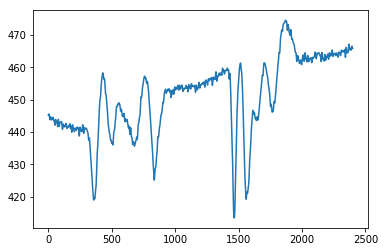

In [54]:
plt.plot(x[200-2])

In [55]:
for i in range(data_size):
    temp = np.array(x[i]).reshape(-1,1)
    tempt = np.array(t).reshape(-1,1)
#     print(temp.shape,tempt.shape)
    res = np.append(tempt,temp,axis=1)
#     print(res.shape)
    tempdf = pd.DataFrame(data=res,
                index=[j for j in range(len(t)*i,len(t)*i+len(t))],
                columns=['time','v'])
    tempdf.insert(0, 'id',[i]*len(t))
#     print(tempdf)
    if(i==0):
        X = tempdf
    else:
        X = X.append(tempdf)

In [56]:
from tsfresh.feature_extraction import extract_features, EfficientFCParameters
from tsfresh.feature_extraction.settings import TimeBasedFCParameters
extracted_features = extract_features(X, column_id='id', column_sort='time', default_fc_parameters=EfficientFCParameters())

Feature Extraction: 100%|██████████| 15/15 [41:22<00:00, 113.79s/it] 


In [57]:
extracted_features.to_csv("/home/cjc/Documents/2019Summer/Texadar/data/final2400.csv")

In [61]:
y =  np.array(y)

In [58]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
impute(extracted_features)

variable,v__abs_energy,v__absolute_sum_of_changes,"v__agg_autocorrelation__f_agg_""mean""__maxlag_40","v__agg_autocorrelation__f_agg_""median""__maxlag_40","v__agg_autocorrelation__f_agg_""var""__maxlag_40","v__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","v__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","v__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","v__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","v__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,v__symmetry_looking__r_0.9,v__symmetry_looking__r_0.9500000000000001,v__time_reversal_asymmetry_statistic__lag_1,v__time_reversal_asymmetry_statistic__lag_2,v__time_reversal_asymmetry_statistic__lag_3,v__value_count__value_-1,v__value_count__value_0,v__value_count__value_1,v__variance,v__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
0,5.432259e+08,609.13,0.895556,0.908958,0.006496,477.013215,-0.022214,-0.004736,0.013816,480.849337,...,1.0,1.0,8122.404445,16357.992573,24747.389386,0.0,0.0,0.0,236.185657,1.0
1,5.052306e+08,610.53,0.929131,0.935496,0.002882,477.727426,-0.556998,-0.153905,0.014875,480.767857,...,1.0,1.0,-1005.459081,-2195.418082,-3520.300628,0.0,0.0,0.0,379.668671,1.0
2,4.953982e+08,579.27,0.921696,0.932458,0.003870,468.442373,-0.498671,-0.113145,0.012748,472.378121,...,1.0,1.0,-3164.938431,-6087.872831,-8740.502084,0.0,0.0,0.0,257.264899,1.0
3,5.028501e+08,588.55,0.901242,0.915418,0.006100,468.751411,-0.439137,-0.086553,0.011478,471.942143,...,1.0,1.0,-3071.977065,-6446.252033,-9692.103212,0.0,0.0,0.0,196.173562,1.0
4,5.106543e+08,587.87,0.914436,0.925224,0.004393,477.666806,-0.591994,-0.131917,0.011641,481.732560,...,1.0,1.0,-8705.215436,-17479.114047,-26211.040708,0.0,0.0,0.0,252.690456,1.0
5,4.844342e+08,569.71,0.973390,0.976602,0.000441,485.472558,-0.762476,-0.302716,0.016651,489.197849,...,1.0,1.0,-13127.123643,-26020.741646,-38992.828212,0.0,0.0,0.0,759.820637,1.0
6,5.286980e+08,574.74,0.865392,0.881538,0.010484,462.653966,0.390271,0.062167,0.009507,466.054099,...,1.0,1.0,6231.376213,12720.571184,19368.479691,0.0,0.0,0.0,136.812062,1.0
7,4.939004e+08,597.11,0.947773,0.950371,0.001405,482.058337,-0.744270,-0.234690,0.013651,485.214396,...,1.0,1.0,-13245.737860,-26605.657810,-40046.769618,0.0,0.0,0.0,482.014584,1.0
8,5.292085e+08,604.45,0.793235,0.793414,0.019814,460.683919,0.525137,0.081035,0.008512,462.556701,...,1.0,1.0,8807.846780,17641.472237,26605.313161,0.0,0.0,0.0,135.385088,1.0


In [59]:
extracted_features.to_csv("/home/cjc/Documents/2019Summer/Texadar/data/final_impute2400.csv")

In [62]:
features_filtered = select_features(extracted_features, y)

In [63]:
features_filtered.to_csv("/home/cjc/Documents/2019Summer/Texadar/data/final_filtered2400.csv")

In [ ]:
print(features_filtered.shape)

In [ ]:
features_filtered.head()

In [ ]:
list(features_filtered.columns)

In [16]:
extracted_features

""
